In [1]:
import pandas as pd
import numpy as np
import gc
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv("emotions.csv")

In [3]:
eeg_data_columns = data.columns.values.tolist()

In [4]:
print(data["label"].value_counts())
cleanup_rules = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
eeg_data_encoded = data.replace(cleanup_rules, inplace=False)
print(eeg_data_encoded['label'].value_counts())

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64
0    716
1    708
2    708
Name: label, dtype: int64


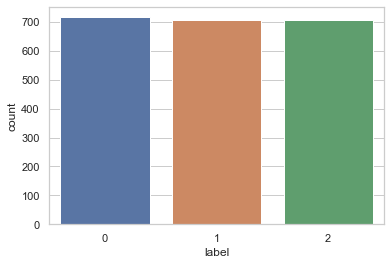

In [5]:
import seaborn as sns
sns.countplot(x=eeg_data_encoded['label'], data=data)

In [6]:
data.count

<bound method DataFrame.count of       # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700  

In [7]:
eeg_data_encoded['label'].unique()

array([2, 0, 1], dtype=int64)

In [8]:
eeg_data_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [9]:
x=eeg_data_encoded.drop(["label"]  ,axis=1)
x.shape

(2132, 2548)

In [10]:
y = eeg_data_encoded.loc[:,'label'].values
y.shape

(2132,)

# Pearson Correlation

In [11]:
feature_name = x.columns.tolist()
def cor_selector(x, y):
    cor_list = []
    for i in x.columns.tolist():
        cor = np.corrcoef(x[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = x.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [12]:
cor_support, cor_feature = cor_selector(x, y)
print(str(len(cor_feature)), 'selected features')

100 selected features


In [13]:
cor_feature

['fft_319_a',
 'fft_316_a',
 'fft_480_b',
 'fft_480_a',
 'fft_694_a',
 'fft_691_a',
 'fft_364_a',
 'fft_361_a',
 'fft_105_b',
 'fft_375_b',
 'fft_49_a',
 'fft_46_a',
 'fft_675_b',
 'fft_105_a',
 'fft_735_b',
 'fft_375_a',
 'eigen_0_b',
 'fft_300_b',
 'fft_690_b',
 'fft_735_a',
 'eigen_0_a',
 'fft_675_a',
 'fft_315_b',
 'fft_360_b',
 'fft_300_a',
 'fft_690_a',
 'fft_315_a',
 'fft_360_a',
 'fft_406_b',
 'fft_409_b',
 'fft_4_a',
 'fft_1_a',
 'fft_4_b',
 'fft_1_b',
 'fft_406_a',
 'fft_409_a',
 'fft_34_b',
 'fft_31_b',
 'fft_31_a',
 'fft_34_a',
 'logm_24_b',
 'fft_405_b',
 'logm_24_a',
 'fft_75_a',
 'fft_75_b',
 'fft_405_a',
 'fft_450_b',
 'fft_450_a',
 'fft_390_b',
 'fft_465_b',
 'fft_15_b',
 'fft_420_b',
 'fft_30_a',
 'fft_30_b',
 'fft_15_a',
 'fft_90_b',
 'fft_390_a',
 'fft_465_a',
 'fft_45_b',
 'fft_90_a',
 'fft_420_a',
 'fft_45_a',
 'fft_0_a',
 'fft_0_b',
 'covmat_117_b',
 'covmat_117_a',
 'mean_d_17_b',
 'mean_d_7_b',
 'mean_d_17_a',
 'mean_d_7_a',
 'mean_d_12_b',
 'mean_d_12_a',
 'me

In [14]:
from sklearn.model_selection import train_test_split
x_cor_feature=data[cor_feature]
x_cor_train, x_cor_test, y_cor_train, y_cor_test = train_test_split(x_cor_feature, y, test_size = 0.2)

# Chi-Squared

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)

SelectKBest(k=100, score_func=<function chi2 at 0x0000017812E4F708>)

In [16]:
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [17]:
chi_feature

['mean_2_a',
 'mean_d_2_a2',
 'mean_d_12_a',
 'stddev_2_a',
 'stddev_3_a',
 'min_2_a',
 'min_q_2_a',
 'min_q_7_a',
 'min_q_12_a',
 'min_q_17_a',
 'covmat_0_a',
 'covmat_13_a',
 'covmat_52_a',
 'covmat_104_a',
 'covmat_117_a',
 'eigen_0_a',
 'eigen_1_a',
 'logm_0_a',
 'logm_1_a',
 'entropy0_a',
 'entropy2_a',
 'entropy3_a',
 'fft_0_a',
 'fft_1_a',
 'fft_4_a',
 'fft_15_a',
 'fft_30_a',
 'fft_31_a',
 'fft_34_a',
 'fft_36_a',
 'fft_39_a',
 'fft_45_a',
 'fft_46_a',
 'fft_49_a',
 'fft_75_a',
 'fft_90_a',
 'fft_285_a',
 'fft_375_a',
 'fft_390_a',
 'fft_405_a',
 'fft_406_a',
 'fft_409_a',
 'fft_411_a',
 'fft_414_a',
 'fft_420_a',
 'fft_421_a',
 'fft_424_a',
 'fft_450_a',
 'fft_465_a',
 'fft_660_a',
 'mean_2_b',
 'mean_d_2_b2',
 'mean_d_12_b',
 'stddev_2_b',
 'stddev_3_b',
 'min_2_b',
 'min_q_2_b',
 'min_q_7_b',
 'min_q_12_b',
 'min_q_17_b',
 'covmat_0_b',
 'covmat_13_b',
 'covmat_52_b',
 'covmat_104_b',
 'covmat_117_b',
 'eigen_0_b',
 'eigen_1_b',
 'logm_0_b',
 'logm_1_b',
 'entropy0_b',
 'ent

In [18]:
from sklearn.model_selection import train_test_split
x_chi_feature=data[chi_feature]
x_chi_train, x_chi_test, y_chi_train, y_chi_test = train_test_split(x_chi_feature, y, test_size = 0.2)

# Recursive Feature Elimination

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 2548 features.
Fitting estimator with 2538 features.
Fitting estimator with 2528 features.
Fitting estimator with 2518 features.
Fitting estimator with 2508 features.
Fitting estimator with 2498 features.
Fitting estimator with 2488 features.
Fitting estimator with 2478 features.
Fitting estimator with 2468 features.
Fitting estimator with 2458 features.
Fitting estimator with 2448 features.
Fitting estimator with 2438 features.
Fitting estimator with 2428 features.
Fitting estimator with 2418 features.
Fitting estimator with 2408 features.
Fitting estimator with 2398 features.
Fitting estimator with 2388 features.
Fitting estimator with 2378 features.
Fitting estimator with 2368 features.
Fitting estimator with 2358 features.
Fitting estimator with 2348 features.
Fitting estimator with 2338 features.
Fitting estimator with 2328 features.
Fitting estimator with 2318 features.
Fitting estimator with 2308 features.
Fitting estimator with 2298 features.
Fitting esti

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=100, step=10, verbose=5)

In [20]:
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


In [21]:
rfe_feature

['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_d_0_a2',
 'mean_d_8_a',
 'mean_d_10_a',
 'stddev_2_a',
 'stddev_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_3_a',
 'max_q_8_a',
 'max_q_11_a',
 'max_q_13_a',
 'max_q_18_a',
 'min_1_a',
 'min_2_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_13_a',
 'min_q_17_a',
 'covmat_0_a',
 'covmat_20_a',
 'covmat_97_a',
 'covmat_104_a',
 'logm_0_a',
 'logm_1_a',
 'logm_2_a',
 'logm_4_a',
 'logm_6_a',
 'logm_7_a',
 'logm_8_a',
 'logm_9_a',
 'logm_11_a',
 'logm_14_a',
 'logm_24_a',
 'logm_42_a',
 'logm_45_a',
 'logm_64_a',
 'entropy0_a',
 'entropy3_a',
 'fft_30_a',
 'fft_130_a',
 'fft_206_a',
 'fft_209_a',
 'fft_315_a',
 'mean_0_b',
 'mean_1_b',
 'mean_3_b',
 'mean_d_0_b2',
 'mean_d_10_b',
 'stddev_2_b',
 'stddev_3_b',
 'max_4_b',
 'max_q_1_b',
 'max_q_3_b',
 'max_q_8_b',
 'max_q_11_b',
 'max_q_13_b',
 'max_q_18_b',
 'min_1_b',
 'min_2_b',
 'min_3_b',
 'min_q_3_b',
 'min_q_13_b',
 'min_q_15_b',
 'min_q_17_b',
 'min_q_18_b'

In [22]:
from sklearn.model_selection import train_test_split
x_rfe_feature=data[rfe_feature]
x_rfe_train, x_rfe_test, y_rfe_train, y_rfe_test = train_test_split(x_rfe_feature, y, test_size = 0.2)

# SelectFromModel - Logistic Regression

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [24]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

897 selected features


In [25]:
embeded_lr_feature

['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a2',
 'mean_d_3_a2',
 'mean_d_5_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_13_a',
 'mean_d_15_a',
 'mean_d_18_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'max_1_a',
 'max_2_a',
 'max_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_2_a',
 'max_q_3_a',
 'max_q_4_a',
 'max_q_6_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_9_a',
 'max_q_11_a',
 'max_q_12_a',
 'max_q_13_a',
 'max_q_14_a',
 'max_q_16_a',
 'max_q_17_a',
 'max_q_18_a',
 'max_q_22_a',
 'max_q_24_a',
 'max_q_47_a',
 'min_1_a',
 'min_2_a',
 'min_3_a',
 'min_4_a',
 'min_d_0_a',
 'min_d_3_a',
 'min_q_0_a',
 'min_q_1_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_6_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_10_a',
 'min_q_11_a',
 'min_q_12_a',
 'min_q_13_a',
 'min_q_15_a',
 'min_q_16_a',
 'min_q_17_a',
 'min_q_18_a',
 'min_q_37_a',
 'covmat_0_a',
 'covmat_1_a',
 'covmat_5_a',
 'covmat_7_a',
 'covmat_8_a',
 'covmat_9_a',
 'covmat_12_a',
 'covm

In [26]:
from sklearn.model_selection import train_test_split
x_embeded_lr_feature=data[embeded_lr_feature]
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_embeded_lr_feature, y, test_size = 0.2)

# SelectFromModel - RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [28]:
from sklearn.feature_selection import SelectFromModel
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

1161 selected features


In [29]:
embeded_rf_feature

['# mean_0_a',
 'mean_1_a',
 'mean_2_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a',
 'mean_d_1_a',
 'mean_d_3_a',
 'mean_d_0_a2',
 'mean_d_1_a2',
 'mean_d_2_a2',
 'mean_d_3_a2',
 'mean_d_4_a2',
 'mean_d_5_a',
 'mean_d_6_a',
 'mean_d_7_a',
 'mean_d_8_a',
 'mean_d_10_a',
 'mean_d_11_a',
 'mean_d_12_a',
 'mean_d_13_a',
 'mean_d_14_a',
 'mean_d_15_a',
 'mean_d_16_a',
 'mean_d_17_a',
 'mean_d_18_a',
 'mean_d_20_a',
 'mean_d_21_a',
 'mean_d_23_a',
 'mean_d_24_a',
 'mean_d_25_a',
 'mean_d_26_a',
 'mean_d_31_a',
 'mean_d_32_a',
 'mean_d_35_a',
 'mean_d_36_a',
 'mean_d_39_a',
 'mean_d_40_a',
 'mean_d_42_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'stddev_d_0_a',
 'stddev_d_2_a',
 'stddev_d_4_a',
 'moments_0_a',
 'moments_3_a',
 'moments_5_a',
 'moments_6_a',
 'moments_7_a',
 'moments_8_a',
 'moments_10_a',
 'moments_11_a',
 'moments_12_a',
 'moments_13_a',
 'moments_15_a',
 'moments_16_a',
 'moments_17_a',
 'moments_18_a',
 'max_0_a',
 'max_1_a',
 'max_3_a',
 'max_4_a',
 'max

In [30]:
from sklearn.model_selection import train_test_split
x_embeded_rf_feature=data[embeded_rf_feature]
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_embeded_rf_feature, y, test_size = 0.2)

# SelectFromModel - LGBM

In [31]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(x, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=None, norm_order=1, prefit=False

In [32]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = x.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

2548 selected features


In [33]:
embeded_lgb_feature

['# mean_0_a',
 'mean_1_a',
 'mean_2_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a',
 'mean_d_1_a',
 'mean_d_2_a',
 'mean_d_3_a',
 'mean_d_4_a',
 'mean_d_0_a2',
 'mean_d_1_a2',
 'mean_d_2_a2',
 'mean_d_3_a2',
 'mean_d_4_a2',
 'mean_d_5_a',
 'mean_d_6_a',
 'mean_d_7_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_11_a',
 'mean_d_12_a',
 'mean_d_13_a',
 'mean_d_14_a',
 'mean_d_15_a',
 'mean_d_16_a',
 'mean_d_17_a',
 'mean_d_18_a',
 'mean_d_19_a',
 'mean_d_20_a',
 'mean_d_21_a',
 'mean_d_22_a',
 'mean_d_23_a',
 'mean_d_24_a',
 'mean_d_25_a',
 'mean_d_26_a',
 'mean_d_27_a',
 'mean_d_28_a',
 'mean_d_29_a',
 'mean_d_30_a',
 'mean_d_31_a',
 'mean_d_32_a',
 'mean_d_33_a',
 'mean_d_34_a',
 'mean_d_35_a',
 'mean_d_36_a',
 'mean_d_37_a',
 'mean_d_38_a',
 'mean_d_39_a',
 'mean_d_40_a',
 'mean_d_41_a',
 'mean_d_42_a',
 'mean_d_43_a',
 'mean_d_44_a',
 'mean_d_45_a',
 'mean_d_46_a',
 'mean_d_47_a',
 'mean_d_48_a',
 'mean_d_49_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 's

In [34]:
from sklearn.model_selection import train_test_split
x_embeded_lgb_feature=data[embeded_lgb_feature]
x_lgb_train, x_lgb_test, y_lgb_train, y_lgb_test = train_test_split(x_embeded_lgb_feature, y, test_size = 0.2)

In [35]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(2548)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,stddev_2_b,True,True,True,True,True,True,6
2,stddev_2_a,True,True,True,True,True,True,6
3,min_q_7_a,True,True,True,True,True,True,6
4,min_q_2_a,True,True,True,True,True,True,6
5,min_q_17_b,True,True,True,True,True,True,6
6,min_q_17_a,True,True,True,True,True,True,6
7,min_2_b,True,True,True,True,True,True,6
8,min_2_a,True,True,True,True,True,True,6
9,logm_0_b,True,True,True,True,True,True,6
10,logm_0_a,True,True,True,True,True,True,6


# KNN - Pearson Correlation

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_corr = KNeighborsClassifier(n_neighbors=3)
knn_corr.fit(x_cor_train, y_cor_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
mean_accuracy=knn_corr.score(x_cor_test, y_cor_test)
y_pred = knn_corr.predict(x_cor_test)
print(mean_accuracy)

0.8360655737704918


In [38]:
y_pred

array([2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2,
       1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1,

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[122  11   0]
 [ 20  92  27]
 [  0  12 143]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       133
           1       0.80      0.66      0.72       139
           2       0.84      0.92      0.88       155

    accuracy                           0.84       427
   macro avg       0.83      0.83      0.83       427
weighted avg       0.83      0.84      0.83       427



In [40]:
print ("Training Accuracy {}".format(knn_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(knn_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.8997067448680351
Testing Accuracy 0.8360655737704918


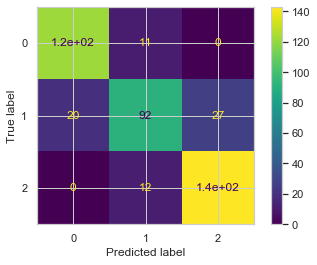

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_corr, x_cor_test, y_cor_test)
plt.show() 

# Decision Tree - Pearson Correlation

In [42]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_corr = DecisionTreeClassifier(random_state=0)
decisiontree_corr.fit(x_cor_train, y_cor_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
mean_accuracy=decisiontree_corr.score(x_cor_test, y_cor_test)
y_pred = decisiontree_corr.predict(x_cor_test)
print(mean_accuracy)

0.9039812646370023


In [44]:
y_pred

array([2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1,

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[125   8   0]
 [  7 120  12]
 [  0  14 141]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       133
           1       0.85      0.86      0.85       139
           2       0.92      0.91      0.92       155

    accuracy                           0.90       427
   macro avg       0.90      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427



In [46]:
print ("Training Accuracy {}".format(decisiontree_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(decisiontree_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 1.0
Testing Accuracy 0.9039812646370023


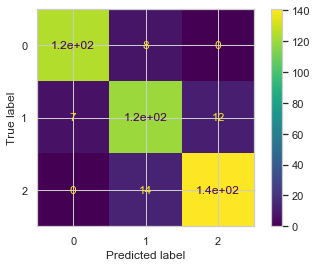

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree_corr, x_cor_test, y_cor_test)
plt.show() 

# Random Forest - Pearson Correlation

In [48]:
from sklearn.ensemble import RandomForestClassifier
randomforest_corr = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_corr.fit(x_cor_train, y_cor_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
mean_accuracy=randomforest_corr.score(x_cor_test, y_cor_test)
y_pred = randomforest_corr.predict(x_cor_test)
print(mean_accuracy)

0.9203747072599532


In [50]:
y_pred

array([2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1,

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[130   3   0]
 [  7 109  23]
 [  0   1 154]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       133
           1       0.96      0.78      0.87       139
           2       0.87      0.99      0.93       155

    accuracy                           0.92       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.92      0.92       427



In [52]:
print ("Training Accuracy {}".format(randomforest_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(randomforest_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.9008797653958944
Testing Accuracy 0.9203747072599532


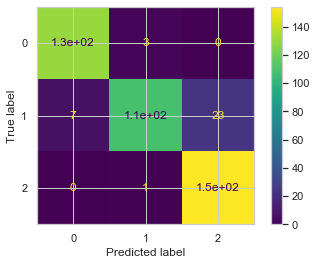

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomforest_corr, x_cor_test, y_cor_test)
plt.show() 

# Gaussian Naive Bayes - Pearson Correlation

In [54]:
from sklearn.naive_bayes import GaussianNB
gaussian_corr = GaussianNB()
gaussian_corr.fit(x_cor_train, y_cor_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
mean_accuracy=gaussian_corr.score(x_cor_test, y_cor_test)
y_pred = gaussian_corr.predict(x_cor_test)
print(mean_accuracy)

0.6838407494145199


In [56]:
y_pred

array([2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1,

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[130   3   0]
 [ 69  49  21]
 [  0  42 113]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       133
           1       0.52      0.35      0.42       139
           2       0.84      0.73      0.78       155

    accuracy                           0.68       427
   macro avg       0.67      0.69      0.66       427
weighted avg       0.68      0.68      0.66       427



In [58]:
print ("Training Accuracy {}".format(gaussian_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(gaussian_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.6985337243401759
Testing Accuracy 0.6838407494145199


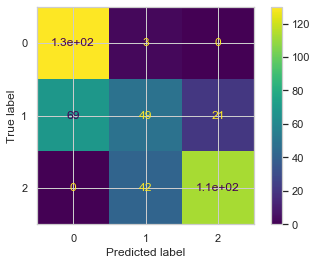

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_corr, x_cor_test, y_cor_test)
plt.show() 

# SVM - Pearson Correlation

In [60]:
from sklearn import svm
support_corr = svm.LinearSVC(random_state=20)
support_corr.fit(x_cor_train, y_cor_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [61]:
mean_accuracy=support_corr.score(x_cor_test, y_cor_test)
y_pred = support_corr.predict(x_cor_test)
print(mean_accuracy)

0.49882903981264637


In [62]:
y_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1,

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[131   2   0]
 [ 84  54   1]
 [127   0  28]]
              precision    recall  f1-score   support

           0       0.38      0.98      0.55       133
           1       0.96      0.39      0.55       139
           2       0.97      0.18      0.30       155

    accuracy                           0.50       427
   macro avg       0.77      0.52      0.47       427
weighted avg       0.78      0.50      0.46       427



In [64]:
print ("Training Accuracy {}".format(support_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(support_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.547800586510264
Testing Accuracy 0.49882903981264637


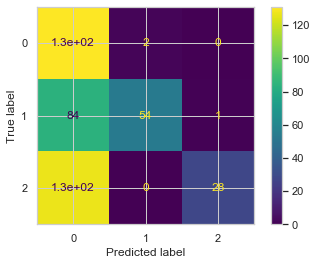

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(support_corr, x_cor_test, y_cor_test)
plt.show() 

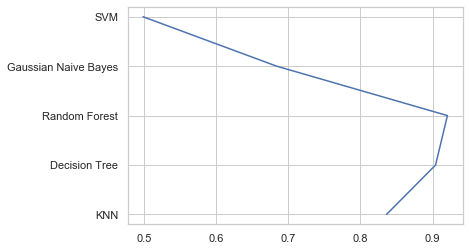

In [66]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
plt.plot(x,y)

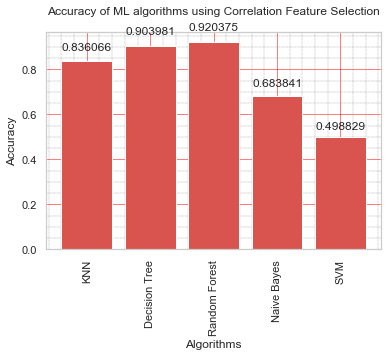

In [67]:
import matplotlib.pyplot as plt
x = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using Correlation Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

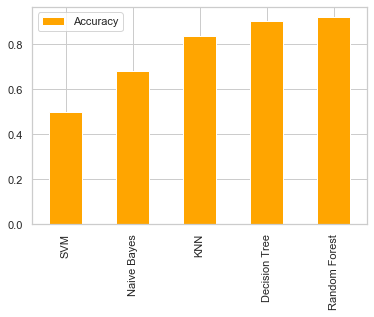

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
n=[knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='bar', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

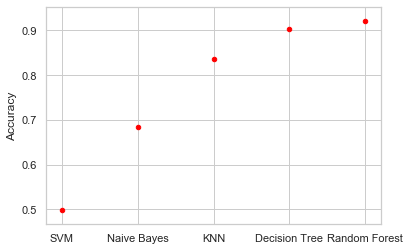

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

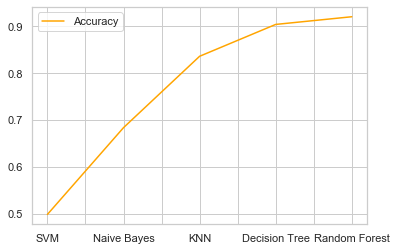

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
n=[knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

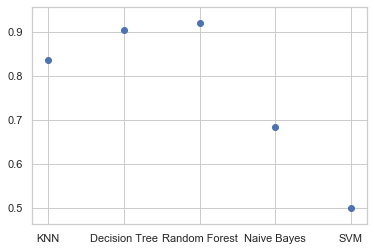

In [71]:
plt.scatter(x,y)

# KNN - Chi2

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_chi = KNeighborsClassifier(n_neighbors=3)
knn_chi.fit(x_chi_train, y_chi_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
mean_accuracy=knn_chi.score(x_chi_test, y_chi_test)
y_pred = knn_chi.predict(x_chi_test)
print(mean_accuracy)

0.8454332552693209


In [74]:
y_pred

array([2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1,

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[140   9   0]
 [ 14  96  30]
 [  0  13 125]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       149
           1       0.81      0.69      0.74       140
           2       0.81      0.91      0.85       138

    accuracy                           0.85       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.85      0.84       427



In [76]:
print ("Training Accuracy {}".format(knn_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(knn_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.92316715542522
Testing Accuracy 0.8454332552693209


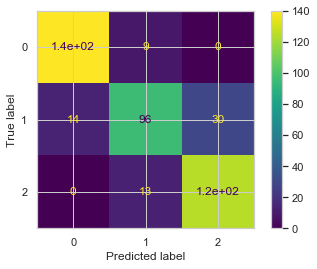

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_chi, x_chi_test, y_chi_test)
plt.show() 

# Decision Tree - Chi2

In [78]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_chi = DecisionTreeClassifier(random_state=0)
decisiontree_chi.fit(x_chi_train, y_chi_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [79]:
mean_accuracy=decisiontree_chi.score(x_chi_test, y_chi_test)
y_pred = decisiontree_chi.predict(x_chi_test)
print(mean_accuracy)

0.955503512880562


In [80]:
y_pred

array([2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[144   5   0]
 [  4 131   5]
 [  0   5 133]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       149
           1       0.93      0.94      0.93       140
           2       0.96      0.96      0.96       138

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [82]:
print ("Training Accuracy {}".format(decisiontree_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(decisiontree_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 1.0
Testing Accuracy 0.955503512880562


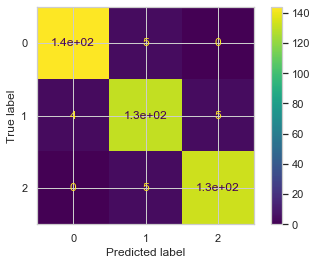

In [83]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree_chi, x_chi_test, y_chi_test)
plt.show() 

# Random Forest - Chi2

In [84]:
from sklearn.ensemble import RandomForestClassifier
randomforest_chi = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_chi.fit(x_chi_train, y_chi_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
mean_accuracy=randomforest_chi.score(x_chi_test, y_chi_test)
y_pred = randomforest_chi.predict(x_chi_test)
print(mean_accuracy)

0.8758782201405152


In [86]:
y_pred

array([2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[133  16   0]
 [  2 104  34]
 [  0   1 137]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.86      0.74      0.80       140
           2       0.80      0.99      0.89       138

    accuracy                           0.88       427
   macro avg       0.88      0.88      0.87       427
weighted avg       0.88      0.88      0.87       427



In [88]:
print ("Training Accuracy {}".format(randomforest_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(randomforest_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.9067448680351906
Testing Accuracy 0.8758782201405152


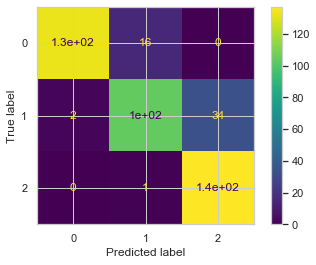

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomforest_chi, x_chi_test, y_chi_test)
plt.show() 

# Gaussian Naive Bayes - Chi2

In [90]:
from sklearn.naive_bayes import GaussianNB
gaussian_chi = GaussianNB()
gaussian_chi.fit(x_chi_train, y_chi_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
mean_accuracy=gaussian_chi.score(x_chi_test, y_chi_test)
y_pred = gaussian_chi.predict(x_chi_test)
print(mean_accuracy)

0.6651053864168618


In [92]:
y_pred

array([1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[144   5   0]
 [ 72  38  30]
 [  0  36 102]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       149
           1       0.48      0.27      0.35       140
           2       0.77      0.74      0.76       138

    accuracy                           0.67       427
   macro avg       0.64      0.66      0.63       427
weighted avg       0.64      0.67      0.63       427



In [94]:
print ("Training Accuracy {}".format(gaussian_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(gaussian_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.6838709677419355
Testing Accuracy 0.6651053864168618


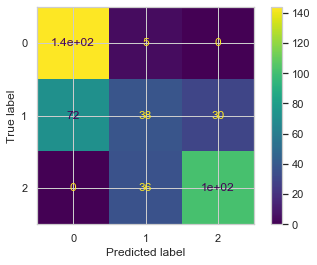

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_chi, x_chi_test, y_chi_test)
plt.show() 

# SVM - Chi2

In [96]:
from sklearn import svm
support_chi = svm.LinearSVC(random_state=20)
support_chi.fit(x_chi_train, y_chi_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [97]:
mean_accuracy=support_chi.score(x_chi_test, y_chi_test)
y_pred = support_chi.predict(x_chi_test)
print(mean_accuracy)

0.7822014051522248


In [98]:
y_pred

array([1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1,

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[138  11   0]
 [  7 108  25]
 [  0  50  88]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       149
           1       0.64      0.77      0.70       140
           2       0.78      0.64      0.70       138

    accuracy                           0.78       427
   macro avg       0.79      0.78      0.78       427
weighted avg       0.79      0.78      0.78       427



In [100]:
print ("Training Accuracy {}".format(support_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(support_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.7782991202346041
Testing Accuracy 0.7822014051522248


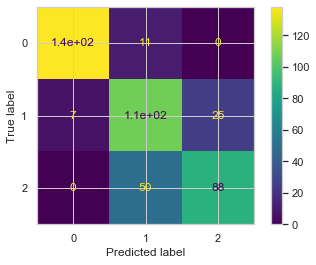

In [101]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(support_chi, x_chi_test, y_chi_test)
plt.show() 

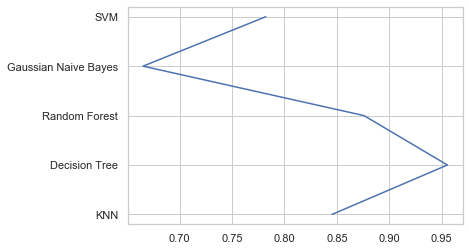

In [102]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
plt.plot(x,y)

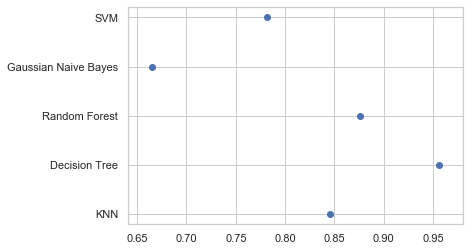

In [103]:
plt.scatter(x,y)

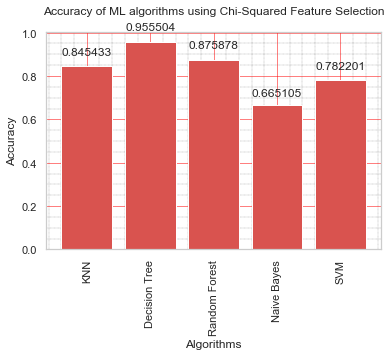

In [104]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using Chi-Squared Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

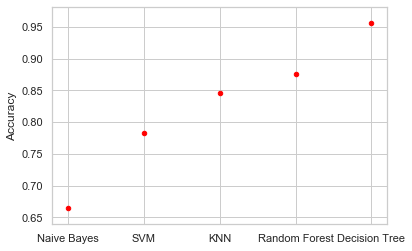

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

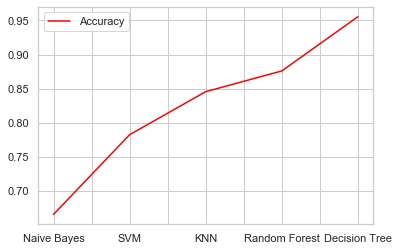

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='line', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - RFE

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_rfe = KNeighborsClassifier(n_neighbors=3)
knn_rfe.fit(x_rfe_train, y_rfe_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [108]:
mean_accuracy=knn_rfe.score(x_rfe_test, y_rfe_test)
y_pred = knn_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8665105386416861


In [109]:
y_pred

array([1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1,
       2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[118  18   0]
 [  8 124  26]
 [  0   5 128]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       136
           1       0.84      0.78      0.81       158
           2       0.83      0.96      0.89       133

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



In [111]:
print ("Training Accuracy {}".format(knn_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(knn_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.9302052785923753
Testing Accuracy 0.8665105386416861


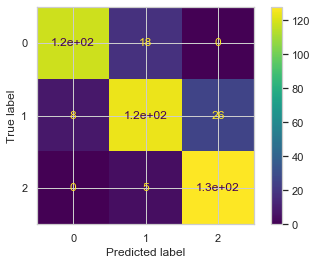

In [112]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_rfe, x_rfe_test, y_rfe_test)
plt.show() 

# DecisionTree - RFE

In [113]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_rfe = DecisionTreeClassifier(random_state=0)
decisiontree_rfe.fit(x_rfe_train, y_rfe_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [114]:
mean_accuracy=decisiontree_rfe.score(x_rfe_test, y_rfe_test)
y_pred = decisiontree_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.9578454332552693


In [115]:
y_pred

array([1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1,

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[133   3   0]
 [  2 150   6]
 [  1   6 126]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       136
           1       0.94      0.95      0.95       158
           2       0.95      0.95      0.95       133

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [117]:
print ("Training Accuracy {}".format(decisiontree_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(decisiontree_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 1.0
Testing Accuracy 0.9578454332552693


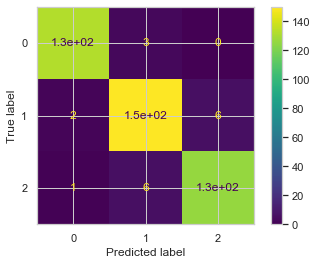

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree_rfe, x_rfe_test, y_rfe_test)
plt.show() 

# RandomForest - RFE

In [119]:
from sklearn.ensemble import RandomForestClassifier
randomforest_rfe = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_rfe.fit(x_rfe_train, y_rfe_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
mean_accuracy=randomforest_rfe.score(x_rfe_test, y_rfe_test)
y_pred = randomforest_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.9227166276346604


In [121]:
y_pred

array([1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[131   5   0]
 [  0 130  28]
 [  0   0 133]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       136
           1       0.96      0.82      0.89       158
           2       0.83      1.00      0.90       133

    accuracy                           0.92       427
   macro avg       0.93      0.93      0.92       427
weighted avg       0.93      0.92      0.92       427



In [123]:
print ("Training Accuracy {}".format(randomforest_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(randomforest_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.92316715542522
Testing Accuracy 0.9227166276346604


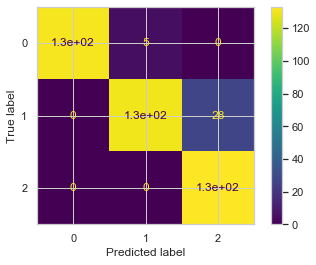

In [124]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomforest_rfe, x_rfe_test, y_rfe_test)
plt.show() 

# Gaussian Naive Bayes - RFE

In [125]:
from sklearn.naive_bayes import GaussianNB
gaussian_rfe = GaussianNB()
gaussian_rfe.fit(x_rfe_train, y_rfe_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [126]:
mean_accuracy=gaussian_rfe.score(x_rfe_test, y_rfe_test)
y_pred = gaussian_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8571428571428571


In [127]:
y_pred

array([1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[126  10   0]
 [ 24 108  26]
 [  0   1 132]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       136
           1       0.91      0.68      0.78       158
           2       0.84      0.99      0.91       133

    accuracy                           0.86       427
   macro avg       0.86      0.87      0.86       427
weighted avg       0.86      0.86      0.85       427



In [129]:
print ("Training Accuracy {}".format(gaussian_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(gaussian_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.8574780058651026
Testing Accuracy 0.8571428571428571


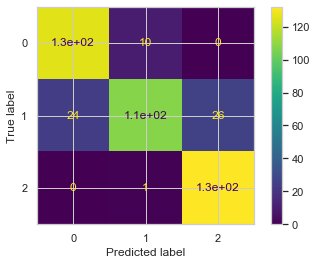

In [130]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_rfe, x_rfe_test, y_rfe_test)
plt.show() 

# SVM - RFE

In [131]:
from sklearn import svm
support_rfe = svm.LinearSVC(random_state=20)
support_rfe.fit(x_rfe_train, y_rfe_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [132]:
mean_accuracy=support_rfe.score(x_rfe_test, y_rfe_test)
y_pred = support_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8899297423887588


In [133]:
y_pred

array([1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[133   3   0]
 [  5 115  38]
 [  0   1 132]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.97      0.73      0.83       158
           2       0.78      0.99      0.87       133

    accuracy                           0.89       427
   macro avg       0.90      0.90      0.89       427
weighted avg       0.91      0.89      0.89       427



In [135]:
print ("Training Accuracy {}".format(support_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(support_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.9014662756598241
Testing Accuracy 0.8899297423887588


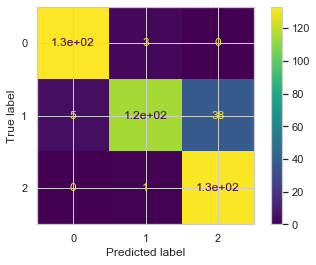

In [136]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(support_rfe, x_rfe_test, y_rfe_test)
plt.show() 

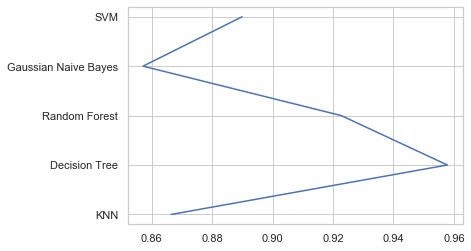

In [137]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]
plt.plot(x,y)

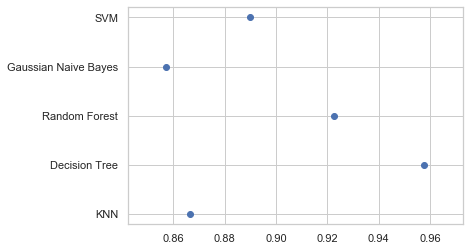

In [138]:
plt.scatter(x,y)

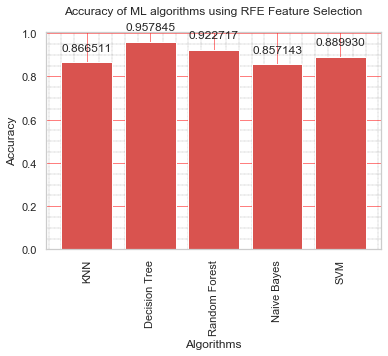

In [139]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using RFE Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

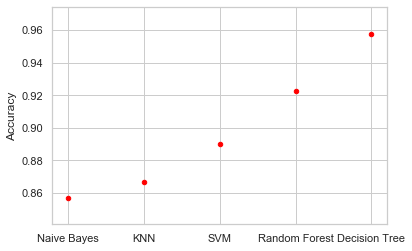

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()



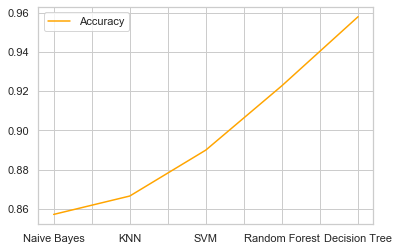

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - LR 

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn_lr = KNeighborsClassifier(n_neighbors=3)
knn_lr.fit(x_lr_train, y_lr_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [143]:
mean_accuracy=knn_lr.score(x_lr_test, y_lr_test)
y_pred = knn_lr.predict(x_lr_test)
print(mean_accuracy)

0.8337236533957846


In [144]:
y_pred

array([1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2,
       2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1,

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[135  11   0]
 [  7 111  29]
 [  0  24 110]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       146
           1       0.76      0.76      0.76       147
           2       0.79      0.82      0.81       134

    accuracy                           0.83       427
   macro avg       0.83      0.83      0.83       427
weighted avg       0.84      0.83      0.83       427



In [146]:
print ("Training Accuracy {}".format(knn_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(knn_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.9038123167155425
Testing Accuracy 0.8337236533957846


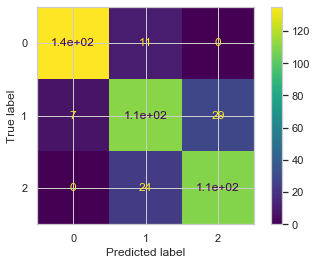

In [147]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_lr, x_lr_test, y_lr_test)
plt.show() 

# Decision Tree - LR

In [148]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_lr = DecisionTreeClassifier(random_state=0)
decisiontree_lr.fit(x_lr_train, y_lr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [149]:
mean_accuracy=decisiontree_lr.score(x_lr_test, y_lr_test)
y_pred = decisiontree_lr.predict(x_lr_test)
print(mean_accuracy)

0.9391100702576113


In [150]:
y_pred

array([1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1,

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[144   2   0]
 [  2 130  15]
 [  0   7 127]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.94      0.88      0.91       147
           2       0.89      0.95      0.92       134

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



In [152]:
print ("Training Accuracy {}".format(decisiontree_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(decisiontree_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 1.0
Testing Accuracy 0.9391100702576113


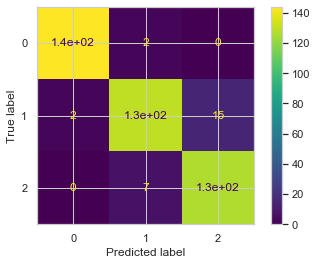

In [153]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree_lr, x_lr_test, y_lr_test)
plt.show() 

# Random Forest - LR

In [154]:
from sklearn.ensemble import RandomForestClassifier
randomforest_lr = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_lr.fit(x_lr_train, y_lr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [155]:
mean_accuracy=randomforest_lr.score(x_lr_test, y_lr_test)
y_pred = randomforest_lr.predict(x_lr_test)
print(mean_accuracy)

0.927400468384075


In [156]:
y_pred

array([1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1,

In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[142   4   0]
 [  1 120  26]
 [  0   0 134]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       146
           1       0.97      0.82      0.89       147
           2       0.84      1.00      0.91       134

    accuracy                           0.93       427
   macro avg       0.93      0.93      0.93       427
weighted avg       0.94      0.93      0.93       427



In [158]:
print ("Training Accuracy {}".format(randomforest_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(randomforest_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.9302052785923753
Testing Accuracy 0.927400468384075


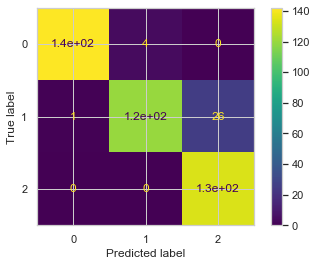

In [159]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomforest_lr, x_lr_test, y_lr_test)
plt.show() 

# Gaussian Naive Bayes - LR

In [160]:
from sklearn.naive_bayes import GaussianNB
gaussian_lr = GaussianNB()
gaussian_lr.fit(x_lr_train, y_lr_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [161]:
mean_accuracy=gaussian_lr.score(x_lr_test, y_lr_test)
y_pred = gaussian_lr.predict(x_lr_test)
print(mean_accuracy)

0.47540983606557374


In [162]:
y_pred

array([0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0,

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[146   0   0]
 [103  35   9]
 [  8 104  22]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       146
           1       0.25      0.24      0.24       147
           2       0.71      0.16      0.27       134

    accuracy                           0.48       427
   macro avg       0.51      0.47      0.41       427
weighted avg       0.50      0.48      0.42       427



In [164]:
print ("Training Accuracy {}".format(gaussian_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(gaussian_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.47038123167155427
Testing Accuracy 0.47540983606557374


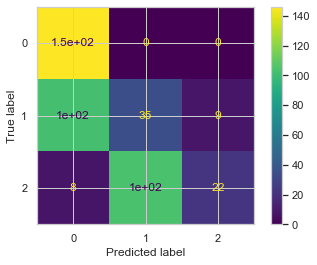

In [165]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_lr, x_lr_test, y_lr_test)
plt.show() 

# SVM - LR

In [166]:
from sklearn import svm
support_lr = svm.LinearSVC(random_state=20)
support_lr.fit(x_lr_train, y_lr_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [167]:
mean_accuracy=support_lr.score(x_lr_test, y_lr_test)
y_pred = support_lr.predict(x_lr_test)
print(mean_accuracy)

0.8056206088992974


In [168]:
y_pred

array([1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2,
       2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1,

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[141   5   0]
 [ 15  98  34]
 [  0  29 105]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       146
           1       0.74      0.67      0.70       147
           2       0.76      0.78      0.77       134

    accuracy                           0.81       427
   macro avg       0.80      0.81      0.80       427
weighted avg       0.80      0.81      0.80       427



In [170]:
print ("Training Accuracy {}".format(support_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(support_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.8240469208211144
Testing Accuracy 0.8056206088992974


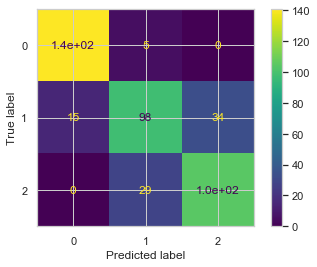

In [171]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(support_lr, x_lr_test, y_lr_test)
plt.show() 

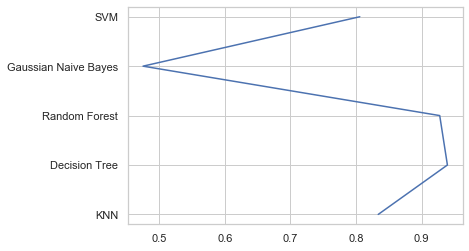

In [172]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]
plt.plot(x,y)

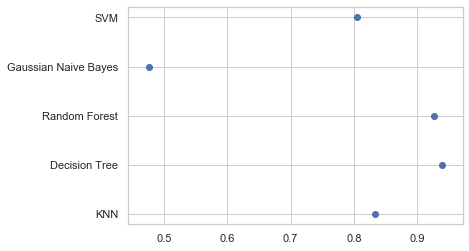

In [173]:
plt.scatter(x,y)

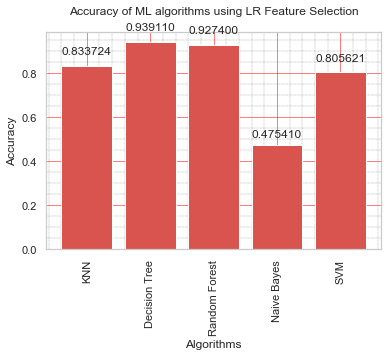

In [174]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using LR Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

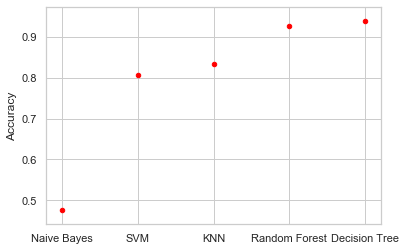

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()



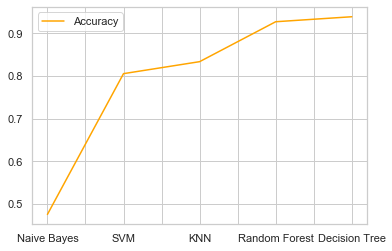

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - RF

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn_rf = KNeighborsClassifier(n_neighbors=3)
knn_rf.fit(x_rf_train, y_rf_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [178]:
mean_accuracy=knn_rf.score(x_rf_test, y_rf_test)
y_pred = knn_rf.predict(x_rf_test)
print(mean_accuracy)

0.8266978922716628


In [179]:
y_pred

array([2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2,
       1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2,

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[132  15   0]
 [ 21  98  18]
 [  1  19 123]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       147
           1       0.74      0.72      0.73       137
           2       0.87      0.86      0.87       143

    accuracy                           0.83       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.83      0.83      0.83       427



In [181]:
print ("Training Accuracy {}".format(knn_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(knn_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.9032258064516129
Testing Accuracy 0.8266978922716628


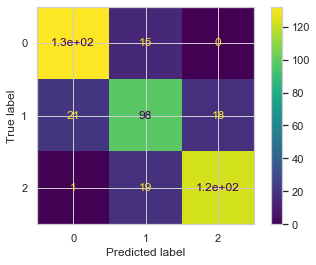

In [182]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_rf, x_rf_test, y_rf_test)
plt.show() 

# Decision Tree - RF

In [183]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_rf = DecisionTreeClassifier(random_state=0)
decisiontree_rf.fit(x_rf_train, y_rf_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [184]:
mean_accuracy=decisiontree_rf.score(x_rf_test, y_rf_test)
y_pred = decisiontree_rf.predict(x_rf_test)
print(mean_accuracy)

0.9648711943793911


In [185]:
y_pred

array([2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0,
       2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2,

In [186]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[144   2   1]
 [  2 130   5]
 [  0   5 138]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       147
           1       0.95      0.95      0.95       137
           2       0.96      0.97      0.96       143

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [187]:
print ("Training Accuracy {}".format(decisiontree_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(decisiontree_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 1.0
Testing Accuracy 0.9648711943793911


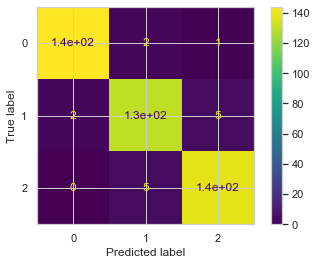

In [188]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisiontree_rf, x_rf_test, y_rf_test)
plt.show() 

# Random Forest - RF

In [189]:
from sklearn.ensemble import RandomForestClassifier
randomforest_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_rf.fit(x_rf_train, y_rf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [190]:
mean_accuracy=randomforest_rf.score(x_rf_test, y_rf_test)
y_pred = randomforest_rf.predict(x_rf_test)
print(mean_accuracy)

0.9414519906323185


In [191]:
y_pred

array([2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0,
       2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2,

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[143   4   0]
 [  0 117  20]
 [  0   1 142]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       147
           1       0.96      0.85      0.90       137
           2       0.88      0.99      0.93       143

    accuracy                           0.94       427
   macro avg       0.95      0.94      0.94       427
weighted avg       0.95      0.94      0.94       427



In [193]:
print ("Training Accuracy {}".format(randomforest_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(randomforest_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.9266862170087976
Testing Accuracy 0.9414519906323185


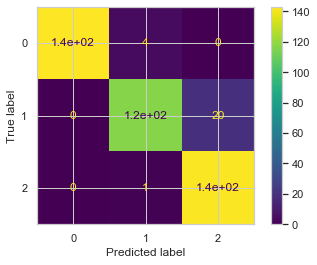

In [194]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomforest_rf, x_rf_test, y_rf_test)
plt.show() 

# Gaussian Naive Bayes - RF

In [195]:
from sklearn.naive_bayes import GaussianNB
gaussian_rf = GaussianNB()
gaussian_rf.fit(x_rf_train, y_rf_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [196]:
mean_accuracy=gaussian_rf.score(x_rf_test, y_rf_test)
y_pred = gaussian_rf.predict(x_rf_test)
print(mean_accuracy)

0.4028103044496487


In [197]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [198]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[146   1   0]
 [112  25   0]
 [ 28 114   1]]
              precision    recall  f1-score   support

           0       0.51      0.99      0.67       147
           1       0.18      0.18      0.18       137
           2       1.00      0.01      0.01       143

    accuracy                           0.40       427
   macro avg       0.56      0.39      0.29       427
weighted avg       0.57      0.40      0.29       427



In [199]:
print ("Training Accuracy {}".format(gaussian_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(gaussian_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.4211143695014663
Testing Accuracy 0.4028103044496487


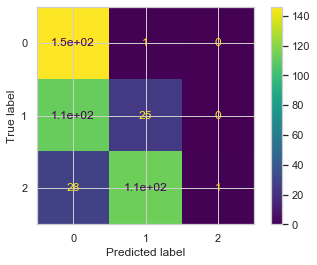

In [200]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_rf, x_rf_test, y_rf_test)
plt.show() 

# SVM - RF

In [201]:
from sklearn import svm
support_rf = svm.LinearSVC(random_state=20)
support_rf.fit(x_rf_train, y_rf_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [202]:
mean_accuracy=support_rf.score(x_rf_test, y_rf_test)
y_pred = support_rf.predict(x_rf_test)
print(mean_accuracy)

0.5550351288056206


In [203]:
y_pred

array([0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,

In [204]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[122  21   4]
 [ 38  90   9]
 [114   4  25]]
              precision    recall  f1-score   support

           0       0.45      0.83      0.58       147
           1       0.78      0.66      0.71       137
           2       0.66      0.17      0.28       143

    accuracy                           0.56       427
   macro avg       0.63      0.55      0.52       427
weighted avg       0.62      0.56      0.52       427



In [205]:
print ("Training Accuracy {}".format(support_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(support_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.5442815249266862
Testing Accuracy 0.5550351288056206


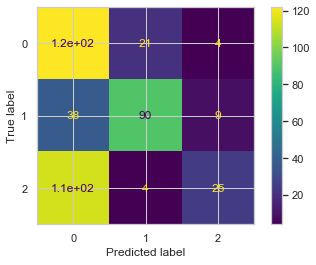

In [206]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(support_rf, x_rf_test, y_rf_test)
plt.show() 

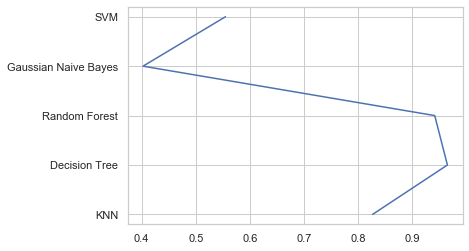

In [207]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
plt.plot(x,y)

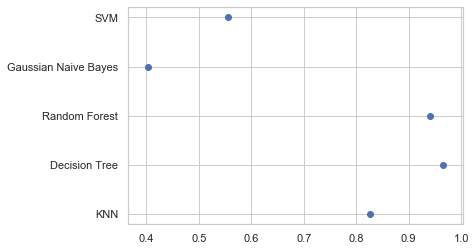

In [208]:
plt.scatter(x,y)

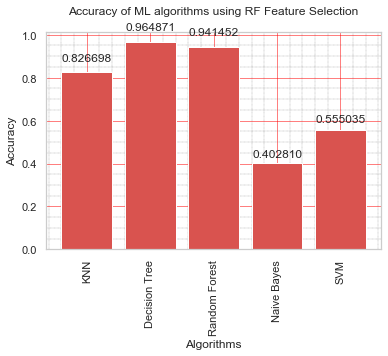

In [209]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using RF Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

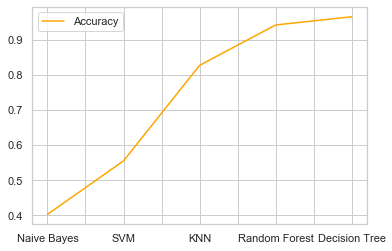

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

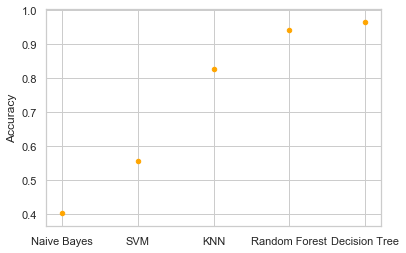

In [211]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

In [212]:
print ("KNN_COR : {}".format(knn_corr.score(x_cor_test, y_cor_test)))
print ("KNN_CHI : {}".format(knn_chi.score(x_chi_test, y_chi_test)))
print ("KNN_RFE : {}".format(knn_rfe.score(x_rfe_test, y_rfe_test)))
print ("KNN_LR  : {}".format(knn_lr.score(x_lr_test, y_lr_test)))
print ("KNN_RF  : {}".format(knn_rf.score(x_rf_test, y_rf_test)))

print ("DecisionTree_COR : {}".format(decisiontree_corr.score(x_cor_test, y_cor_test)))
print ("DecisionTree_CHI : {}".format(decisiontree_chi.score(x_chi_test, y_chi_test)))
print ("DecisionTree_RFE : {}".format(decisiontree_rfe.score(x_rfe_test, y_rfe_test)))
print ("DecisionTree_LR  : {}".format(decisiontree_lr.score(x_lr_test, y_lr_test)))
print ("DecisionTree_RF  : {}".format(decisiontree_rf.score(x_rf_test, y_rf_test)))

print ("RandomForest_COR : {}".format(randomforest_corr.score(x_cor_test, y_cor_test)))
print ("RandomForest_CHI : {}".format(randomforest_chi.score(x_chi_test, y_chi_test)))
print ("RandomForest_RFE : {}".format(randomforest_rfe.score(x_rfe_test, y_rfe_test)))
print ("RandomForest_LR  : {}".format(randomforest_lr.score(x_lr_test, y_lr_test)))
print ("RandomForest_RF  : {}".format(randomforest_rf.score(x_rf_test, y_rf_test)))

print ("GaussianNaiveBayes_COR : {}".format(gaussian_corr.score(x_cor_test, y_cor_test)))
print ("GaussianNaiveBayes_CHI : {}".format(gaussian_chi.score(x_chi_test, y_chi_test)))
print ("GaussianNaiveBayes_RFE : {}".format(gaussian_rfe.score(x_rfe_test, y_rfe_test)))
print ("GaussianNaiveBayes_LR  : {}".format(gaussian_lr.score(x_lr_test, y_lr_test)))
print ("GaussianNaiveBayes_RF  : {}".format(gaussian_rf.score(x_rf_test, y_rf_test)))

print ("SVM_COR : {}".format(support_corr.score(x_cor_test, y_cor_test)))
print ("SVM_CHI : {}".format(support_chi.score(x_chi_test, y_chi_test)))
print ("SVM_RFE : {}".format(support_rfe.score(x_rfe_test, y_rfe_test)))
print ("SVM_LR  : {}".format(support_lr.score(x_lr_test, y_lr_test)))
print ("SVM_RF  : {}".format(support_rf.score(x_rf_test, y_rf_test)))

KNN_COR : 0.8360655737704918
KNN_CHI : 0.8454332552693209
KNN_RFE : 0.8665105386416861
KNN_LR  : 0.8337236533957846
KNN_RF  : 0.8266978922716628
DecisionTree_COR : 0.9039812646370023
DecisionTree_CHI : 0.955503512880562
DecisionTree_RFE : 0.9578454332552693
DecisionTree_LR  : 0.9391100702576113
DecisionTree_RF  : 0.9648711943793911
RandomForest_COR : 0.9203747072599532
RandomForest_CHI : 0.8758782201405152
RandomForest_RFE : 0.9227166276346604
RandomForest_LR  : 0.927400468384075
RandomForest_RF  : 0.9414519906323185
GaussianNaiveBayes_COR : 0.6838407494145199
GaussianNaiveBayes_CHI : 0.6651053864168618
GaussianNaiveBayes_RFE : 0.8571428571428571
GaussianNaiveBayes_LR  : 0.47540983606557374
GaussianNaiveBayes_RF  : 0.4028103044496487
SVM_COR : 0.49882903981264637
SVM_CHI : 0.7822014051522248
SVM_RFE : 0.8899297423887588
SVM_LR  : 0.8056206088992974
SVM_RF  : 0.5550351288056206


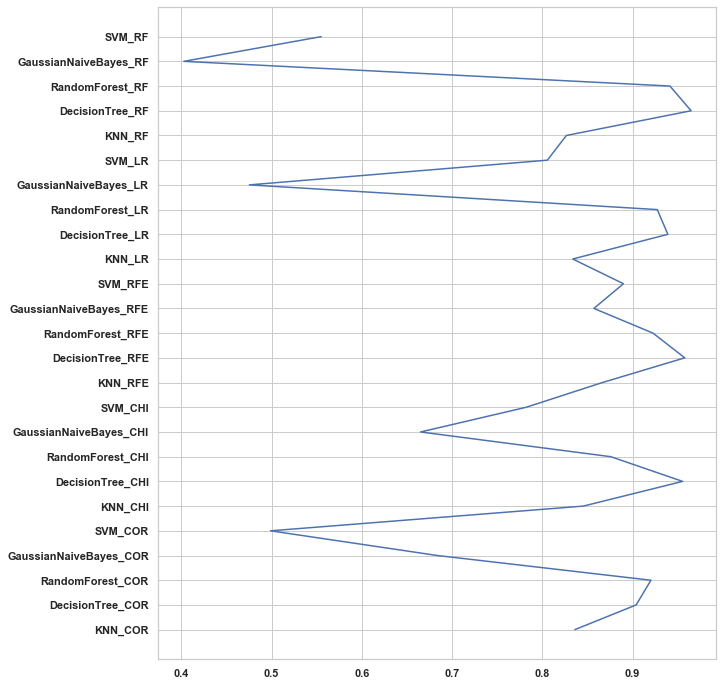

In [213]:
y=['KNN_COR', 'DecisionTree_COR', 'RandomForest_COR', 'GaussianNaiveBayes_COR', 'SVM_COR',
  'KNN_CHI', 'DecisionTree_CHI', 'RandomForest_CHI', 'GaussianNaiveBayes_CHI', 'SVM_CHI',
   'KNN_RFE', 'DecisionTree_RFE', 'RandomForest_RFE', 'GaussianNaiveBayes_RFE', 'SVM_RFE',
   'KNN_LR', 'DecisionTree_LR', 'RandomForest_LR', 'GaussianNaiveBayes_LR', 'SVM_LR',
   'KNN_RF', 'DecisionTree_RF', 'RandomForest_RF', 'GaussianNaiveBayes_RF', 'SVM_RF']
x = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test),
     knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test),
     knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test),
knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test),
knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
plt.rcParams.update({'figure.figsize':(10,12), 'font.size': 36, 'font.weight' : 'bold'})
plt.plot(x,y)

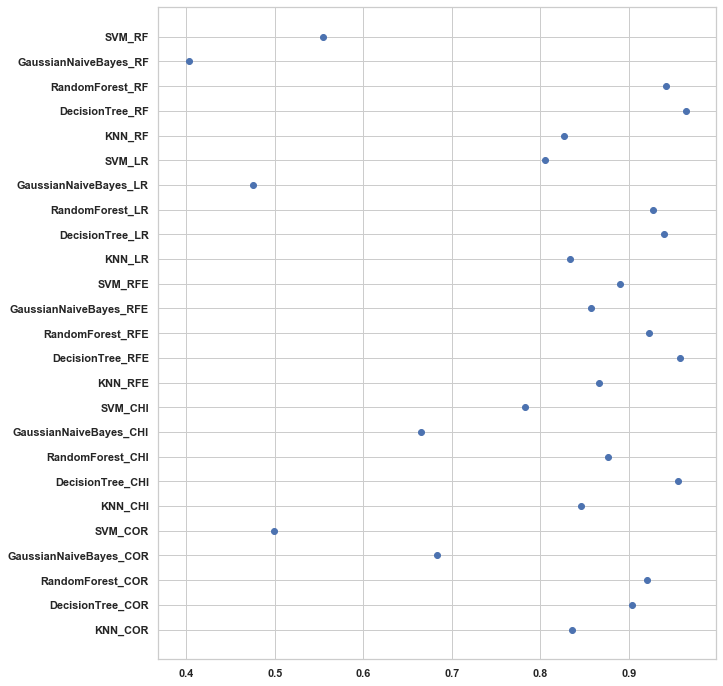

In [214]:
plt.scatter(x,y)